In [1]:
class Polygon:
    def __init__(self,sides, name):
        self.sides = sides
        self.name = name
        

In [2]:
square = Polygon(4, "Square")
pentagon = Polygon(5, "Pentagon")

In [3]:
print(square.sides)

4


In [4]:
print(square.name)

Square


## Defining a Class Method

In [5]:
import turtle

class Polygon:
    def __init__(self,sides, name):
        self.sides = sides
        self.name = name
    
    def draw(self):     
        for i in range(self.sides):
            turtle.forward(100)
            turtle.right(90)
        turtle.done()    

In [6]:
square = Polygon(4, "Square")
square.draw()


## Now we ought to alter the draw method so that we can draw all polygons

(n-2) X 180 degrees/n

In [13]:
class Polygon:
    def __init__(self,sides, name):
        self.sides = sides
        self.name = name
        self.interior_angles = (self.sides -2)*180
        self.angle = self.interior_angles/self.sides
    
    def draw(self):     
        for i in range(self.sides):
            turtle.forward(100)
            turtle.right(180-self.angle)
        turtle.done()    

In [14]:
pentagon = Polygon(5, "Pentagon")
pentagon.draw()

In [25]:
hexagon = Polygon(6, "Hexagon")
hexagon.draw()

## We can also alter the class to be able to handle polygons of various sizes and colors

In [62]:
class Polygon:
    def __init__(self,sides, name, size = 100, color = "black", line_thickness = 2):
        self.sides = sides
        self.name = name
        self.size = size
        self.color = color
        self.line_thickness = line_thickness
        self.interior_angles = (self.sides -2)*180
        self.angle = self.interior_angles/self.sides
    
    def draw(self):
        turtle.color(self.color)
        turtle.pensize(self.line_thickness)
        for i in range(self.sides):
            turtle.forward(self.size)
            turtle.right(180-self.angle)
           

In [28]:
hexagon = Polygon(6, "Hexagon")
hexagon.draw()

In [34]:
hexagon = Polygon(6, "Hexagon",15)
hexagon.draw()

In [53]:
hexagon = Polygon(6, "Hexagon", 250, color = "red",line_thickness = 50)
hexagon.draw()

## Inheritance and Subclassing

Lets say if we wanted to define a class that was specifically a square without having to write the entire logic involved in the polygon class

In [54]:
class Square(Polygon):
    def __init__(self, size = 100, color = "black", line_thickness = 2):
        super().__init__(4, "Square", size, color, line_thickness)

Having done this, we have defined a subclass for square which gives us the methods from the parent or super class, in this case the polygon class

In [55]:
square = Square()

In [56]:
square.sides

4

In [58]:
square.angle

90.0

Subclassing allows us to reuse code making our work less verbose and messy

In [59]:
square = Square(color = '#245bcd')

In [61]:
square.draw()

## Method Overwritting

With subclasses, we can also modify existing methods to better fit our needs. Lets say we want to change the draw method to be able to fill in the polygon as well

In [79]:
class Square(Polygon):
    def __init__(self, size = 100, color = "black", line_thickness = 2):
        super().__init__(4, "Square", size, color, line_thickness)
    
    def draw(self):
        turtle.begin_fill()
        super().draw()
        turtle.end_fill()


In [80]:
square = Square(color = '#245bcd')

In [82]:
square.draw()
turtle.done()

## Plotting points with classes

In [88]:
import matplotlib.pyplot as plt
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def plot(self):
        plt.scatter(self.x, self.y)

In [89]:
point1 = Point(4,5)

In [90]:
point1.x

4

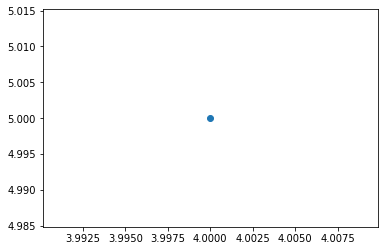

In [91]:
point1.plot()

In [92]:
point2 = Point(2,2)

In [93]:
point1+point2

TypeError: unsupported operand type(s) for +: 'Point' and 'Point'

The error here is due to the fact that it doesn't know how to perform addition for the Point class which is where the concept of Operator Overloading Comes in

In [94]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def plot(self):
        plt.scatter(self.x, self.y)
        
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)

In [95]:
point1 = Point(4,5)
point2 = Point(2,2)

In [96]:
point3 = point1+point2

In [98]:
point3.x

6

In [99]:
point3.y

7

What if we tried adding a constant to point1?

In [100]:
point4 = point1 + 5

AttributeError: 'int' object has no attribute 'x'

Similar to the earlier case, we need to write code to handle for this kind of operations

In [101]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def plot(self):
        plt.scatter(self.x, self.y)
        
    def __add__(self,other):
        if isinstance(other, Point):
            x = self.x + other.x
            y = self.y + other.y
            return Point(x,y)
        else:
            x = self.x + other
            y = self.y + other
            return Point(x,y)

In [102]:
point1 = Point(4,5)
point4 = point1 + 5

In [103]:
point4.x

9

In [105]:
point4.y

10